In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(0)

In [3]:
n_samples = 1000

In [4]:
age = np.random.randint(1, 91, size=n_samples)
gender = np.random.randint(0, 2, size=n_samples)
pclass = np.random.randint(1, 4, size=n_samples)

In [5]:
survival_chance = (gender * 0.8 + pclass * 0.1) / 2
survived = np.random.binomial(1, survival_chance)

In [6]:
survived

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [7]:
data = pd.DataFrame({'X0': np.ones(n_samples), 'Age': age, 'Gender': gender, 'Pclass': pclass, 'Survived': survived})

In [8]:
X = data[['X0', 'Age', 'Gender', 'Pclass']].values 
y = data['Survived'].values.reshape(-1, 1) 

In [9]:
X_train, X_test = X[:int(0.8 * n_samples)], X[int(0.8 * n_samples):]
y_train, y_test = y[:int(0.8 * n_samples)], y[int(0.8 * n_samples):]

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [12]:
def cost(X, Y, theta):
    y_p = hypothesis(X, theta)
    loss = -1 * (np.mean(Y * np.log(y_p) + (1 - Y) * np.log(1 - y_p)))
    return loss

In [13]:
def gradient(X, Y, theta):
    y_p = hypothesis(X, theta)
    grad = np.dot(X.T , (Y - y_p))
    return grad / X.shape[0]

In [14]:
def gradient_descent(X, Y, learning_rate=0.3, epochs=100):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []
    for i in range(epochs):
        print('The algo is on epoch no : ',i, end = '\r')
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        theta = theta + learning_rate * grad
    return theta, cost_epoch


In [15]:
theta, cost_history = gradient_descent(X_train, y_train, learning_rate=0.003, epochs=1000)

In [16]:
theta

array([[-0.12803549],
       [-0.01102495],
       [ 0.2066408 ],
       [-0.10190001]])

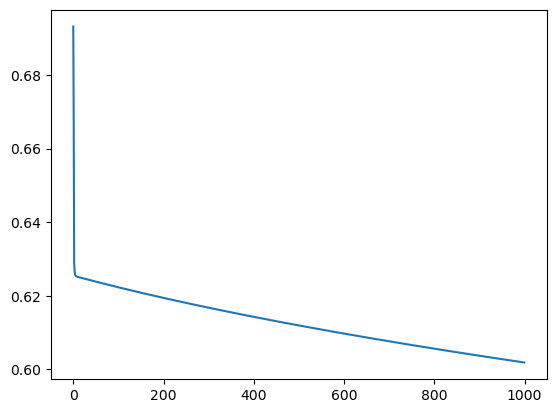

In [17]:
plt.plot(cost_history)

In [18]:
def predict(X, theta):
    y_p = hypothesis(X, theta)
    return (y_p >= 0.5).astype(int)

In [19]:
y_pred = predict(X_test, theta)

In [20]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [21]:
accuracy = np.mean(y_pred == y_test)

In [22]:
accuracy

0.595